In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.datasets as data

In [5]:
import seaborn as sns

In [6]:
sns.set_context('poster')
sns.set_style('white')
sns.set_color_codes()
plot_kwds = {'alpha':0.5, 's':80,'linewidths':0}

In [32]:
moons, _ = data.make_moons(n_samples=50, noise=0.05)
blobs, _ = data.make_blobs(n_samples=50, centers=[(-0.75, 2.25),(1.0,2.0)], cluster_std=0.25)
test_data = np.vstack([moons, blobs])

In [ ]:
import uproot
infile = '/Users/yw18581/Downloads/largedrum_1L_dense_MedianCut_3cmVoxel_withoutCut.discriminator.root'
fu = uproot.open(infile)
histogram = fu['histMedianMetric'].values()


In [81]:
test_data = histogram.ravel()[...,np.newaxis]

In [34]:
import hdbscan

In [111]:
clusterer = hdbscan.HDBSCAN(min_cluster_size=3, gen_min_span_tree=True, 
                            cluster_selection_epsilon=0.1)
clusterer.fit(test_data)

HDBSCAN(cluster_selection_epsilon=0.1, gen_min_span_tree=True,
        min_cluster_size=3)

In [112]:
np.unique(clusterer.labels_)

array([0, 1])

In [113]:
clusterer.labels_.shape

(143748,)

In [114]:
lab = clusterer.labels_.reshape(66,66,33)

In [115]:
from collections import Counter

In [116]:
c = Counter(lab.ravel())

In [117]:
c.most_common()

[(0, 133868), (1, 9880)]

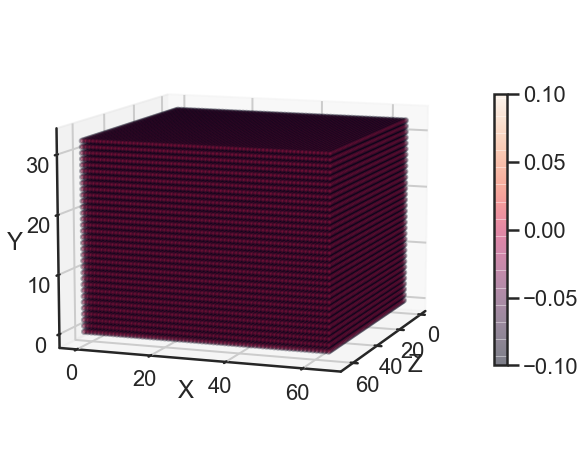

In [118]:

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111,projection="3d")
#ax.set_title('voxels with > 15 neighbours of the same kind')
xx, yy, zz = np.where(lab == 0)
pnt3d = ax.scatter(xx, yy, zz, c=lab[lab==0], s=20, alpha=.3, )
cbar=plt.colorbar(pnt3d, shrink=0.5)
ax.set_xlabel('Z')
ax.set_ylabel('X')
ax.set_zlabel('Y')
# plt.legend(loc='upper right')
ax.view_init(elev=10, azim=20)
plt.draw()

In [45]:
palette = sns.color_palette()
cluster_colors = [sns.desaturate(palette[col], sat)
                  if col >= 0 else (0.5, 0.5, 0.5) for col, sat in
                  zip(clusterer.labels_, clusterer.probabilities_)]
plt.scatter(test_data.T[0], test_data.T[1], c=cluster_colors, **plot_kwds)

IndexError: list index out of range

hdbscan.HDBSCAN(algorithm='best', alpha=0.1, approx_min_span_tree=True, 
       get_min_span_tree=True, leaf_size=40, memory=Memory(cachedir=None),
    metric='euclidean', min_cluster_size=5, min_samples=None, p=None)

<AxesSubplot:>

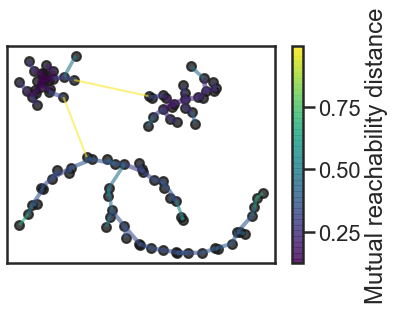

In [22]:
clusterer.minimum_spanning_tree_.plot(edge_cmap='viridis',
                                      edge_alpha=0.6,
                                      node_size=80,
                                      edge_linewidth=2)

<AxesSubplot:ylabel='distance'>

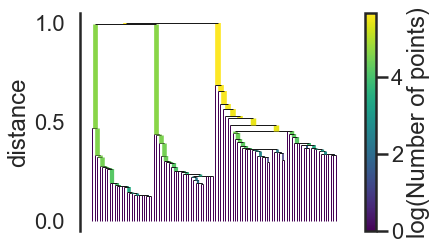

In [21]:
clusterer.single_linkage_tree_.plot(cmap='viridis', colorbar=True)

<AxesSubplot:ylabel='$\\lambda$ value'>

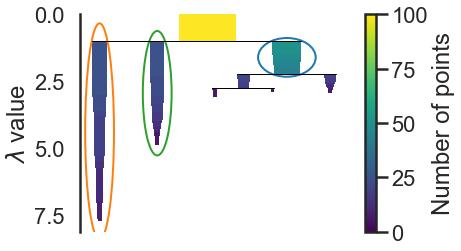

In [20]:
clusterer.condensed_tree_.plot(select_clusters=True, selection_palette=sns.color_palette())